In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

We will be discussing basic image transformations in opencv

### Reading an image

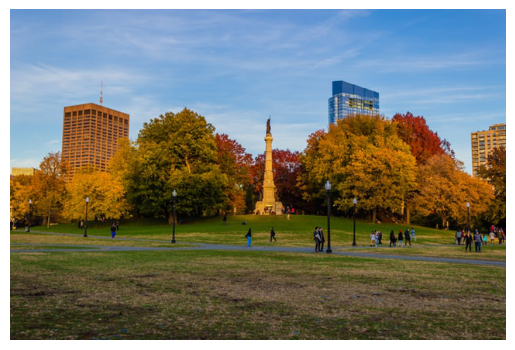

In [7]:
img = cv.cvtColor(cv.imread('Photos/park.jpg'),cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

## Transformation 1: Image Translation

Translattion means shifting an image to x-axis and y-axis

* +ve x --> image translation towards right
* -ve x --> image translation towards left
* +ve y --> image translation towards down
* -ve y --> image translation towards up

#### Translating function

In [18]:
# img --> The image to be translated
# x --> no of pixels by which the image will be translated along x-axis
# y --> no of pixels by which the image will be translated along the y-axis
def translation_func(img,x,y):
    translation_matrix = np.float32([[1,0,x],[0,1,y]])
    width = img.shape[1]
    height = img.shape[0]
    img_dimensions = (width,height)
    return cv.warpAffine(img,translation_matrix,img_dimensions)

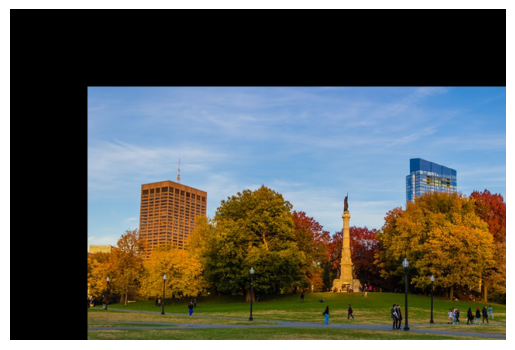

In [21]:
img_translated = translation_func(img,100,100)

plt.imshow(img_translated)
plt.axis('off')
plt.show()

## Transformation 2: Image Rotation

#### Rotation function

In [24]:
# img --> The image that we want to rotate
# angle -> Rotation angle of the image
# rotation point --> Point about which the rotation will take place
def rotation_func(img,angle,rot_point=None):
    (height,width) = img.shape[:2]
    if rot_point==None:
        rot_point=(width//2,height//2)
    rotation_matrix = cv.getRotationMatrix2D(rot_point,angle,1.0)   # no scaling of the rotated image
    dimensions = (width,height)
    return cv.warpAffine(img,rotation_matrix,dimensions)

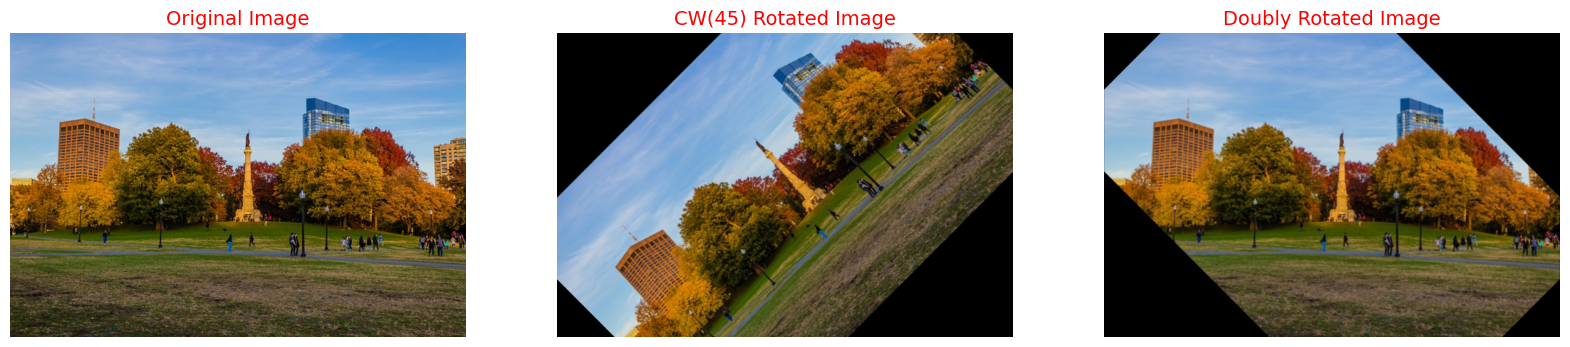

In [26]:
img_rot = rotation_func(img,45)
img_rot_again = rotation_func(img_rot,-45)

fig,ax = plt.subplots(1,3,figsize=(20,6))

ax[0].imshow(img)
ax[0].axis('off')
ax[0].set_title('Original Image',fontsize=14,color='red')

ax[1].imshow(img_rot)
ax[1].axis('off')
ax[1].set_title('CW(45) Rotated Image',fontsize=14,color='red')

ax[2].imshow(img_rot_again)
ax[2].axis('off')
ax[2].set_title('Doubly Rotated Image',fontsize=14,color='red')

plt.show()

## Transformation 3: Flipping an image

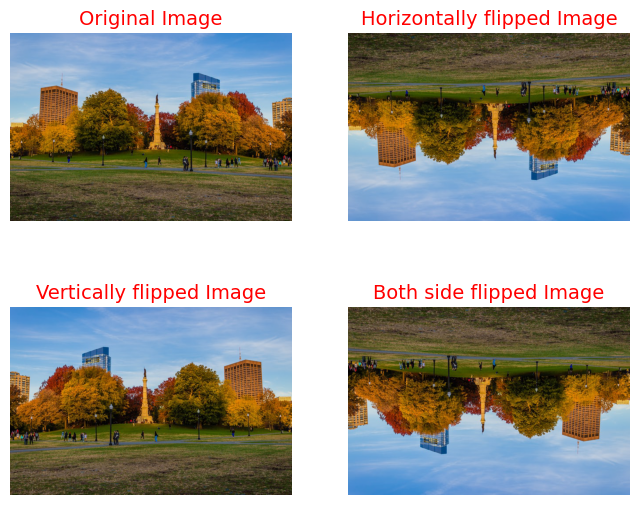

In [37]:
img_flip_aboutx = cv.flip(img,0)
img_flip_abouty = cv.flip(img,1)
img_flip_both = cv.flip(img,-1)

fig,ax = plt.subplots(2,2,figsize=(8,8))
plt.subplots_adjust(hspace=-0.2)
ax[0,0].imshow(img)
ax[0,0].axis('off')
ax[0,0].set_title('Original Image',fontsize=14,color='red')

ax[0,1].imshow(img_flip_aboutx)
ax[0,1].axis('off')
ax[0,1].set_title('Horizontally flipped Image',fontsize=14,color='red')

ax[1,0].imshow(img_flip_abouty)
ax[1,0].axis('off')
ax[1,0].set_title('Vertically flipped Image',fontsize=14,color='red')

ax[1,1].imshow(img_flip_both)
ax[1,1].axis('off')
ax[1,1].set_title('Both side flipped Image',fontsize=14,color='red')

plt.show()

There are other transformations such as resizing and cropping, which were discussed in the other notebooks